In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from google.colab import files

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
train=pd.read_csv('gdrive/My Drive/train_data.csv')

In [ ]:
test=pd.read_csv('gdrive/My Drive/test_data.csv')

In [ ]:
MODEL_NAME = "signlanguage--{}.model".format("6conv-fire")

In [ ]:
train_labels=train['label']
test_labels=test['label']

In [ ]:
train.drop(columns=['label'],inplace=True)


In [ ]:
test.drop(columns=['label'],inplace=True)

In [ ]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,166,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,210,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,205,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
train,test=train/255.0,test/255.0

In [ ]:
train.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,0.619608,0.627451,0.639216,0.647059,0.623529,0.650980,0.658824,0.666667,0.666667,0.670588,0.670588,0.670588,0.674510,0.670588,0.670588,0.666667,0.666667,0.662745,0.435294,0.474510,0.505882,0.529412,0.552941,0.564706,0.580392,0.592157,0.603922,0.615686,0.627451,0.639216,...,0.803922,0.807843,0.807843,0.811765,0.811765,0.807843,0.807843,0.800000,0.803922,0.800000,0.796078,0.792157,0.556863,0.592157,0.627451,0.674510,0.768627,0.737255,0.737255,0.745098,0.529412,0.376471,0.337255,0.301961,0.301961,0.309804,0.690196,0.803922,0.811765,0.811765,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,0.619608,0.611765,0.603922,0.603922,0.600000,0.596078,0.592157,0.584314,0.584314,0.580392,0.576471,0.572549,0.564706,0.556863,0.560784,0.541176,0.360784,0.423529,0.619608,0.623529,0.623529,0.623529,0.627451,0.627451,0.627451,0.627451,0.627451,0.627451,0.627451,0.623529,...,0.392157,0.305882,0.470588,0.615686,0.658824,0.419608,0.388235,0.474510,0.521569,0.380392,0.372549,0.470588,0.529412,0.454902,0.372549,0.309804,0.270588,0.337255,0.545098,0.678431,0.784314,0.725490,0.686275,0.776471,0.486275,0.462745,0.368627,0.549020,0.521569,0.329412,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,0.725490,0.725490,0.725490,0.721569,0.721569,0.721569,0.709804,0.709804,0.701961,0.701961,0.701961,0.698039,0.698039,0.427451,0.203922,0.258824,0.301961,0.325490,0.737255,0.741176,0.741176,0.737255,0.737255,0.741176,0.737255,0.737255,0.737255,0.737255,0.733333,0.725490,...,0.796078,0.800000,0.796078,0.788235,0.784314,0.784314,0.780392,0.776471,0.768627,0.764706,0.760784,0.756863,0.776471,0.650980,0.517647,0.447059,0.349020,0.290196,0.309804,0.301961,0.290196,0.305882,0.517647,0.737255,0.823529,0.819608,0.807843,0.803922,0.800000,0.796078,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,0.819608,0.811765,0.815686,0.811765,0.807843,0.796078,0.792157,0.788235,0.784314,0.776471,0.772549,0.764706,0.752941,0.772549,0.670588,0.200000,0.203922,0.211765,0.831373,0.835294,0.843137,0.843137,0.831373,0.831373,0.835294,0.831373,0.831373,0.827451,0.827451,0.819608,...,0.968627,0.949020,0.913725,0.905882,0.901961,0.898039,0.890196,0.882353,0.874510,0.866667,0.862745,0.847059,0.227451,0.200000,0.192157,0.196078,0.223529,0.235294,0.066667,0.058824,0.070588,0.066667,0.074510,0.003922,0.623529,1.000000,0.929412,0.937255,0.929412,0.925490,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,0.737255,0.741176,0.741176,0.745098,0.749020,0.741176,0.745098,0.745098,0.733333,0.745098,0.752941,0.756863,0.749020,0.749020,0.752941,0.752941,0.760784,0.760784,0.650980,0.662745,0.674510,0.682353,0.694118,0.705882,0.713725,0.725490,0.729412,0.733333,0.745098,0.749020,...,0.352941,0.301961,0.345098,0.458824,0.482353,0.498039,

In [ ]:
train=train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [ ]:
import matplotlib.pyplot as plt

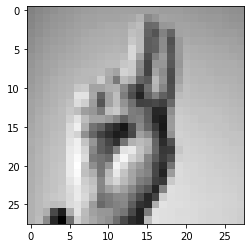

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(train[500].reshape(28,28),cmap='gray')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization

Using TensorFlow backend.


In [ ]:
model = Sequential([
                    Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)),
                    BatchNormalization(),
                    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
                    Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
                    Dropout(0.2),
                    BatchNormalization(),
                    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
                    Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
                    BatchNormalization(),
                    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
                    Flatten(),
                    Dense(units = 512 , activation = 'relu'),
                    Dropout(0.3),
                    Dense(units = 25 , activation = 'softmax'),
                    ])

In [ ]:
from sklearn.model_selection import train_test_split
train, train_val, train_labels, train_labels_val = train_test_split(train, train_labels, test_size = 0.2, random_state = 42)

In [ ]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
  model.load(MODEL_NAME)
  print('model loaded!')

In [ ]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

model.fit(train,train_labels,validation_data=(train_val,train_labels_val),epochs=10,batch_size=100)

Train on 21964 samples, validate on 5491 samples
Epoch 1/10
21964/21964 [==============================] - 80s 4ms/step - loss: 0.5777 - accuracy: 0.8269 - val_loss: 3.0473 - val_accuracy: 0.1313
Epoch 2/10
21964/21964 [==============================] - 80s 4ms/step - loss: 0.0259 - accuracy: 0.9946 - val_loss: 0.7745 - val_accuracy: 0.7525
Epoch 3/10
21964/21964 [==============================] - 80s 4ms/step - loss: 0.0098 - accuracy: 0.9980 - val_loss: 0.0231 - val_accuracy: 0.9985
Epoch 4/10
21964/21964 [==============================] - 80s 4ms/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 5/10
21964/21964 [==============================] - 80s 4ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0234 - val_accuracy: 0.9947
Epoch 6/10
21964/21964 [==============================] - 79s 4ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.2070 - val_accuracy: 0.9381
Epoch 7/10
21964/21964 [==============================] - 79s 4ms/ste

In [ ]:
print("accuracy",model.evaluate(test,test_labels)[1])

7172/7172 [==============================] - 8s 1ms/step
accuracy 0.8752091526985168


In [ ]:
classnames=['A','B','C','D','E','F','G','H','I','K',
            'L','M','N','O','P','Q','R','S','T','U'
            'V','W','X','Y']

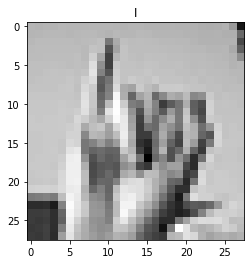

In [ ]:
y_pred = model.predict_classes(test)
prediction = model.predict(test)
np.argmax(prediction[10])
plt.figure(figsize=(4,4))
plt.title(classnames[np.argmax(prediction[11])])
plt.imshow(test[11].reshape(28,28),cmap='gray')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test_labels, y_pred.round())

0.8752091466815394